<a href="https://colab.research.google.com/github/luccidomingues/Teste1/blob/main/Rotten_Tomatoes_Movies_Unsupervised_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
movies = pd.read_csv("Rotten Tomatoes Movies.csv")
movies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [5]:
movies.shape

(16638, 17)

###Removendo espaços em branco da coluna genre

In [6]:
movies['genre'] = movies['genre'].str.replace(', ',',')
movies['genre'] = movies['genre'].str.replace(' ,',',')

### Get_dummies

In [7]:
genre = movies.genre.str.get_dummies(sep=',')
genre.shape


(16638, 21)

###Concatenando

In [8]:
movies_conc = pd.concat([movies, genre], axis=1)
movies_conc.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure,Comedy,Drama,Science Fictio...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
movies_conc.shape

(16638, 38)

### Escalando para posterior agrupamento

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_genre = scaler.fit_transform(genre)

scaler_genre.shape

(16638, 21)

## Fazendo os agrupamentos

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

model.fit(scaler_genre)

print(f'Groups {model.labels_}')

Groups [0 0 0 ... 0 0 0]


In [13]:
print(genre.columns)
print(model.cluster_centers_)

Index(['Action & Adventure', 'Animation', 'Anime & Manga',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
       'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')
[[ 4.40419685e-02 -1.87488982e-01 -3.00393774e-02  2.07651314e-02
   4.79315868e-02  7.34786646e-02  9.48325876e-03 -3.57643510e-01
   1.44059944e-01 -2.81040126e-02  2.69461600e-03  5.81760983e-02
  -7.25709963e-02 -8.71205624e-02  8.25778838e-02  5.65648908e-02
   2.06608434e-02 -2.55294210e-01 -5.92666154e-02 -5.08185221e-02
   2.16141638e-02]
 [-4.48354803e-01 -1.87488982e-01 -3.00393774e-02 -1.11795962e-01
  -2.77251790e-01 -5.63567720e-01 -5.16761779e-02  2.62510597e+00
  -7.93963361e-01  2.11761480e-01 -8.58501479e-04 -3.27926333e-01
  -1.91820821e-01  5.9

###Agrupando em Dataframe

In [14]:
group = pd.DataFrame(model.cluster_centers_,
            columns=genre.columns)

group

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,0.044042,-0.187489,-0.030039,0.020765,0.047932,0.073479,0.009483,-0.357644,0.144060,-0.028104,0.002695,0.058176,-0.072571,-0.087121,0.082578,0.056565,0.020661,-0.255294,-0.059267,-0.050819,0.021614
1,-0.448355,-0.187489,-0.030039,-0.111796,-0.277252,-0.563568,-0.051676,2.625106,-0.793963,0.211761,-0.000859,-0.327926,-0.191821,0.599755,-0.463791,-0.326376,-0.317393,1.848519,0.450254,0.347704,-0.119849
2,0.475393,5.323892,0.852991,-0.124975,-0.221188,0.146556,-0.054902,-0.299874,-0.802638,-0.042766,-0.064061,-0.298550,2.478715,0.066148,-0.429675,-0.263880,0.598299,-0.125224,-0.103101,0.046090,-0.117879


###Primeiro fazendo a transposição e depois plotando

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7526898890>,
      dtype=object)

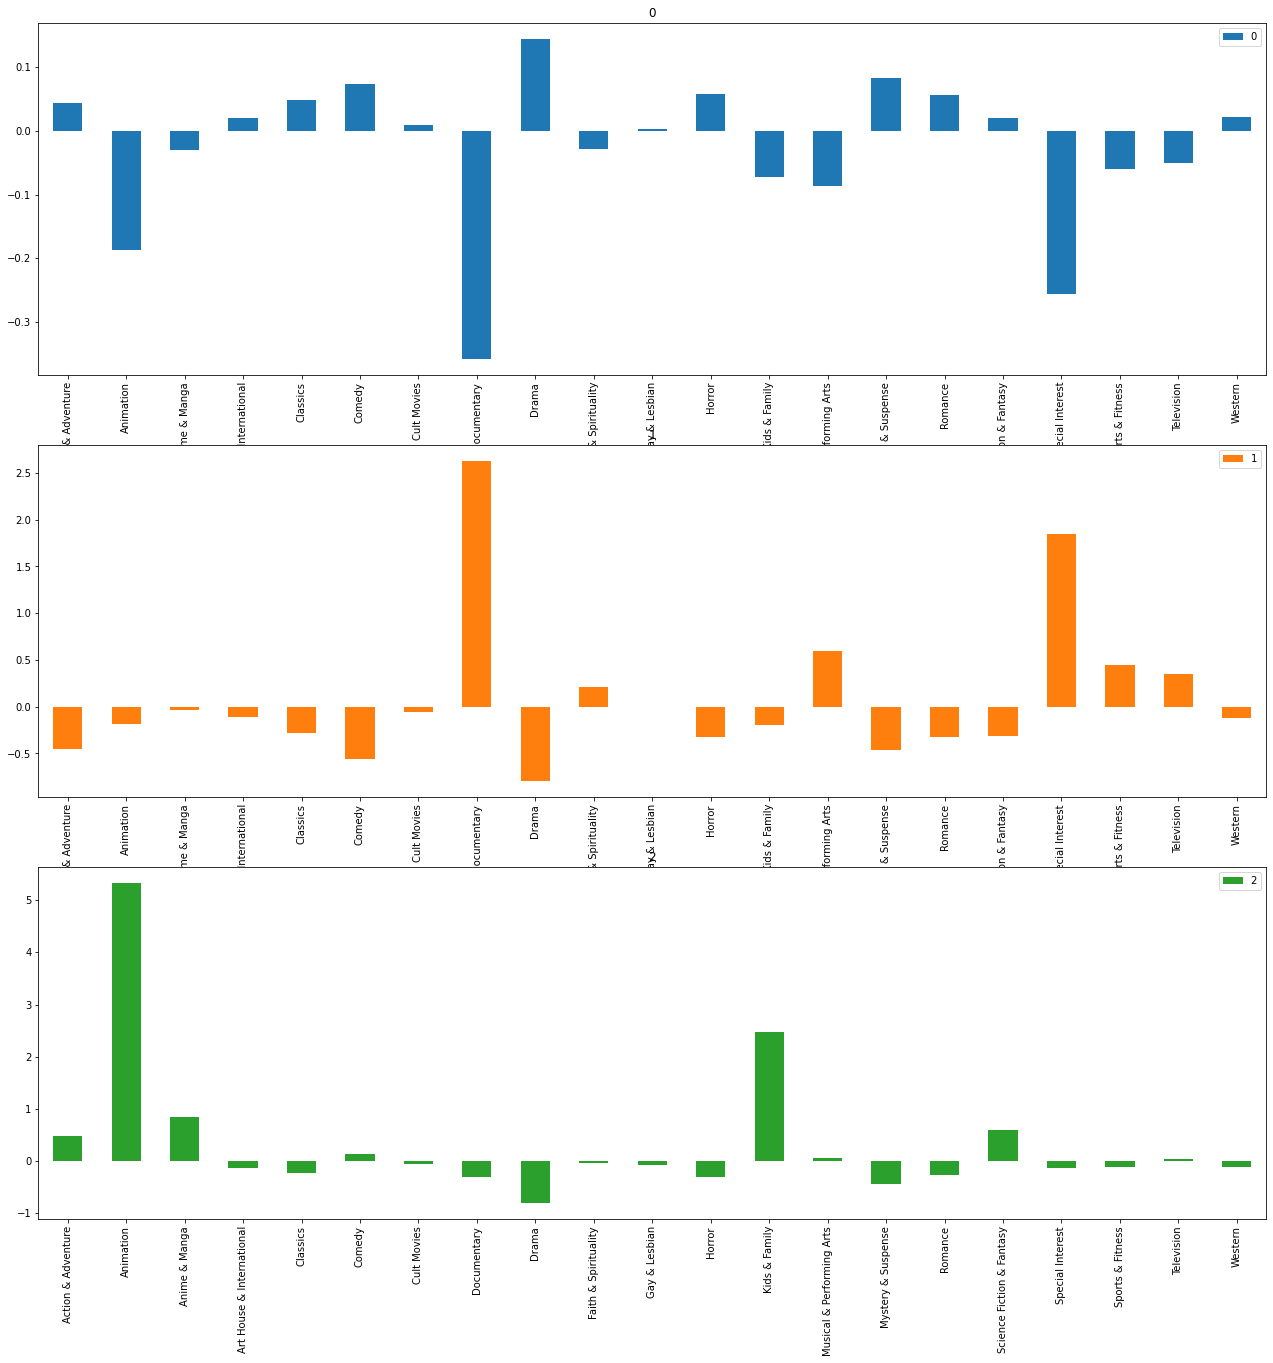

In [15]:
group.transpose().plot.bar(subplots=True,
               figsize=(22, 22),
               sharex=False)

###Fazendo um filtro de samples

In [17]:
grupo = 2

filt = model.labels_ == grupo

movies_conc[filt].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
15416,Toy Story 3,"""Toy Story 3"" welcomes Woody, Buzz and the who...","Deftly blending comedy, adventure, and honest ...",G,"Animation,Comedy,Kids & Family",Lee Unkrich,"Lee Unkrich, Andrew Stanton, John Lasseter, Mi...","Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",2010-06-18,2010-11-02,103.0,Walt Disney Pictures,Certified Fresh,98,305,89.0,606931.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2152,A Turtle's Tale: Sammy's Adventures,nWave Pictures presents this animated adventur...,NaN,PG,"Action & Adventure,Animation,Kids & Family",Ben Stassen,Domonic Paris,"Petrus Kähkönen, Ed Begley Jr., Tuomas Uusital...",NaN,2012-02-06,88.0,nWave Pictures,Rotten,44,18,47.0,2840.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3882,Brother Bear 2,An old friendship is renewed and new bonds are...,NaN,G,"Animation,Kids & Family","Ben Gluck, Benjamin Gluck",Rich Burns,"Patrick Dempsey, Mandy Moore, Jeremy Suarez, R...",2006-08-29,2006-08-29,73.0,Walt Disney Home Entertainment,Rotten,50,8,56.0,24353.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4372,Cinderella,This Disney animated version of Cinderella too...,"The rich colors, sweet songs, adorable mice an...",G,"Animation,Classics,Kids & Family,Science Ficti...","Clyde Geronimi, Wilfred Jackson, Hamilton Luske","Ken Anderson, Bill Peet, Erdman Penner, Ted Se...","Ilene Woods, Eleanor Audley, Verna Felton, Wil...",1950-02-15,2005-10-04,74.0,Walt Disney Pictures,Fresh,97,33,80.0,862072.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3109,Battle For Terra,When the peaceful inhabitants of the planet Te...,Despite its earnest aspirations to be a though...,PG,"Action & Adventure,Animation,Science Fiction &...",Aristomenis Tsirbas,"Aristomenis Tsirbas, Evan Spiliotopoulos","Evan Rachel Wood, Justin Long, Luke Wilson, Br...",2009-05-01,2009-09-22,79.0,Roadside Atrractions,Rotten,49,94,41.0,69083.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14949,The Three Caballeros,Three Caballeros is the first Walt Disney feat...,"One of Disney's more abstract creations, The T...",G,"Animation,Classics,Comedy,Kids & Family","Norman Ferguson, Clyde Geronimi, Harold Young,...","Elmer Plummer, William Cottrell, Del Connell, ...","Clarence Nash, Joaquin Garay, Fred Shields, St...",1944-01-01,2000-05-02,71.0,Walt Disney Home Video,Fresh,82,17,66.0,12229.0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
683,Robin Hood,Robin Hood is one of the first animated films ...,"One of the weaker Disney adaptations, Robin Ho...",G,"Action & Adventure,Animation,Kids & Family,Mus...",Wolfgang Reitherman,"Ken Anderson, Frank Thomas, Larry Clemmons","Brian Bedford, Phil Harris, Monica Evans, Pete...",1973-11-08,2000-07-04,83.0,Buena Vista Pictures,Rotten,54,28,81.0,271595.0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
7484,Hotel Transylvania,"Welcome to the Hotel Transylvania, Dracula's (...","Hotel Transylvania's buoyant, giddy tone may p...",PG,"Animation,Comedy,Kids & Family",Genndy Tartakovsky,"Don Rhymer, Peter Baynham, Robert Smigel","Adam Sandler, Selena Gomez, Andy Samberg, Kevi...",2012-09-28,2013-01-29,91.0,Sony Pictures,Rotten,44,144,72.0,151218.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3176,Beavis and Butt-head Do America,This is a full-length cartoon movie featuring ...,Beavis and Butt-Head Do America is unabashedly...,PG-13,"Animation,Comedy","Mike Judge, Kim Jong-ho, Chris Prynoski, Yvett...","Mike Judge, Joe Stillman","Mike Judge, Robert Stack, Cloris Leachman, Eri...",1996-12-20,1999-11-23,80.0,Paramount Ho

### Visualizando as dimensões - redução de dimensão perdese informação 

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE()

vizu = tsne.fit_transform(scaler_genre)
vizu

array([[ 59.064526  , -10.028588  ],
       [ 14.449074  ,  25.255362  ],
       [-28.758286  ,  21.910809  ],
       ...,
       [-40.753063  , -16.808247  ],
       [-57.07005   , -27.829054  ],
       [  0.43967566,  75.142975  ]], dtype=float32)

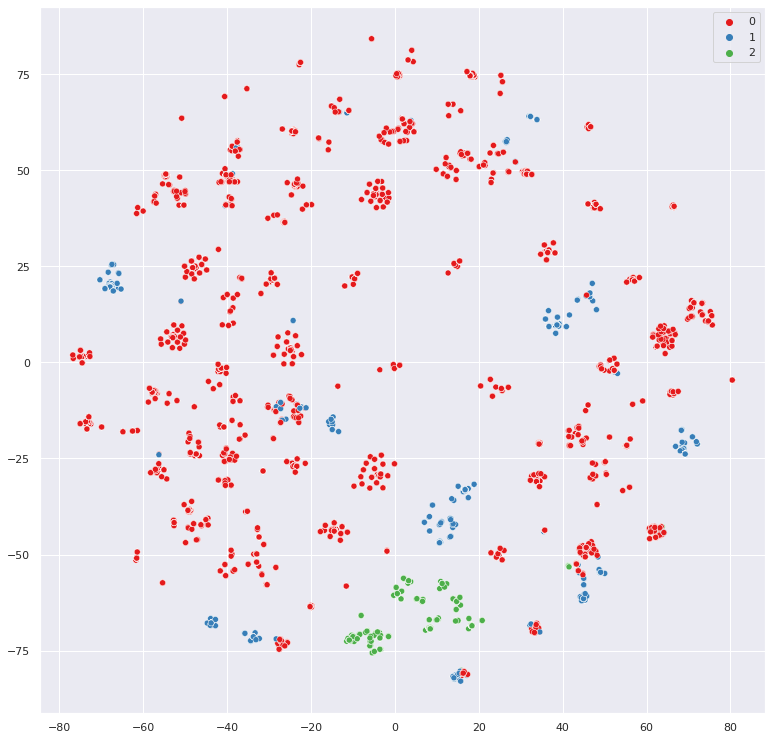

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=vizu[:, 0],
               y=vizu[:, 1],
               hue=model.labels_,
               palette=sns.color_palette('Set1', 3))

###Clusterizando (KMeans) com 20 ao inves de 3 grupos, e transformando em dataframe para plotar

In [29]:
model1 = KMeans(n_clusters=20)

model1.fit(scaler_genre)

group1 = pd.DataFrame(model1.cluster_centers_,
            columns=genre.columns)

group1.head(10)

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,-0.279805,-0.187489,-0.030039,2.431530,-0.323699,-0.017485,-0.077760,-0.253536,0.687624,-0.068630,-0.064061,-0.298830,-0.261772,-0.249633,-0.124719,-0.349055,-0.291059,-0.155534,-0.103101,-0.125503,-0.131543
1,0.485220,-0.187489,-0.030039,-0.312873,-0.323699,-0.516075,-0.077760,-0.343331,0.359933,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,1.998724,-0.321246,-0.342081,-0.259826,-0.103101,-0.125503,-0.131543
2,0.246344,-0.187489,-0.030039,-0.054688,3.089292,-0.261345,-0.077760,-0.328312,0.599558,-0.068630,-0.064061,-0.171657,-0.257075,-0.249633,0.267511,-0.208515,-0.112866,-0.245843,-0.103101,-0.125503,-0.131543
3,-0.502384,-0.187489,-0.030039,-0.411264,-0.323699,1.445577,-0.077760,-0.336763,-0.288930,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.451272,-0.349055,-0.342081,-0.260965,-0.103101,-0.125503,-0.131543
4,-0.464158,-0.163300,-0.030039,-0.146600,-0.293793,-0.577056,-0.077760,2.665584,-0.793947,-0.068630,-0.064061,-0.345826,-0.217064,0.426217,-0.461999,-0.327934,-0.317045,3.556528,-0.103101,-0.125503,-0.131543
5,0.491024,5.333647,-0.030039,-0.160115,-0.233883,0.176028,-0.077760,-0.319537,-0.807144,-0.068630,-0.064061,-0.300552,2.523423,0.046334,-0.434555,-0.258437,0.566330,-0.151326,-0.103101,-0.125503,-0.131543
6,0.847558,-0.167557,-0.030039,-0.195745,1.278066,-0.352260,-0.077760,-0.315519,-0.180672,-0.068630,-0.064061,-0.268883,-0.129148,-0.049915,-0.319883,-0.035784,-0.200621,-0.239610,-0.103101,-0.125503,7.602073
7,-0.502384,-0.187489,-0.030039,-0.411264,-0.323699,-0.690792,-0.077760,0.285177,0.521384,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.500319,-0.349055,-0.342081,-0.281173,-0.103101,-0.125503,-0.131543
8,0.419986,-0.132278,-0.030039,0.157295,0.631939,-0.029189,12.860016,-0.266775,-0.383893,-0.068630,-0.064061,0.990858,-0.139316,0.090809,0.049470,-0.349055,0.637530,-0.050911,-0.103101,-0.044568,0.177802
9,-0.438464,-0.116705,-0.030039,0.098981,0.245133,-0.499952,-0.077760,1.085109,0.148695,14.570782,-0.064061,-0.359585,-0.104777,0.132273,-0.436241,-0.225442,-0.174626,1.047262,0.399580,-0.021740,-0.131543


####Plotando

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f751876a950>,
      dtype=object)

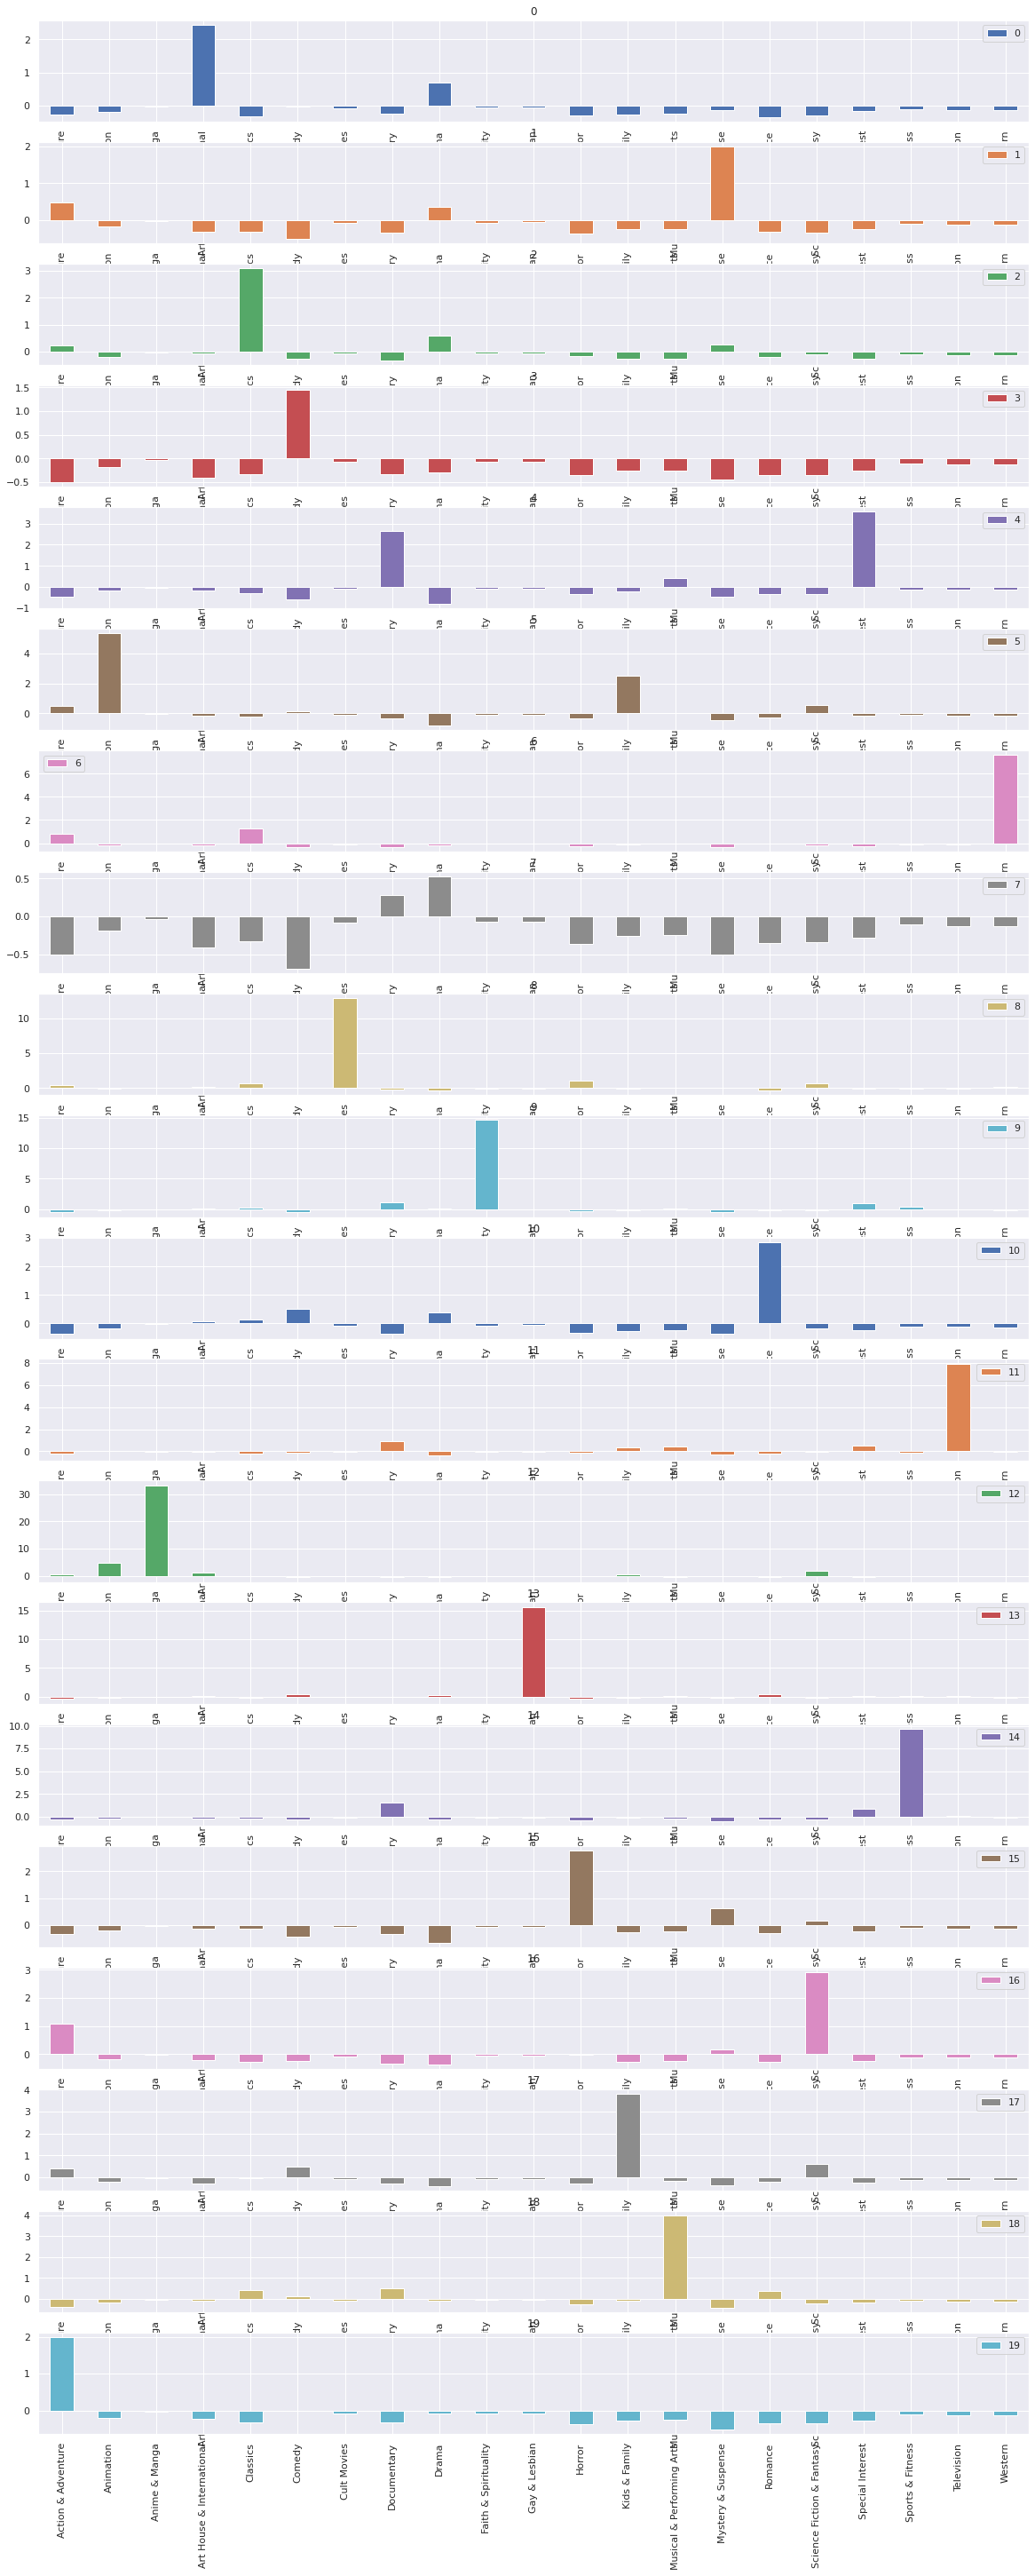

In [47]:
group1.transpose().plot.bar(subplots=True,
               figsize=(20, 50),
               sharex=False,
               rot=90)


In [35]:
group = 2

filter_cluster = model1.labels_ == group

movies_conc[filter_cluster].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
510,Invaders from Mars,Originating during the science-fiction/Red-Sca...,NaN,NR,"Classics,Science Fiction & Fantasy",William Cameron Menzies,"John Tucker Battle, William Cameron Menzies, R...","Arthur Franz, Helena Carter, Leif Erickson, Ji...",1953-04-22,1999-01-07,78.0,20th Century Fox Film Corporation,Fresh,82,11,55.0,2758.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10288,The Naked Prey,In the bush country of South Africa in the lat...,NaN,R,"Action & Adventure,Classics,Drama","Cornel Wilde, Sven Persson","Clint Johnson, Don Peters","Cornel Wilde, Ken Gampu, Gert Van Der Bergh, G...",1966-01-01,2008-01-15,96.0,Paramount Home Video,Fresh,86,14,79.0,1643.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14798,The River,Three teenage girls are living in Bengali (Ind...,Jean Renoir's first film shot in color takes f...,NR,"Classics,Drama",Jean Renoir,"Jean Renoir, Rumer Godden","Nora Swinburne, Esmond Knight, Arthur Shields,...",1959-09-10,2005-03-01,99.0,Criterion Collection,Fresh,91,23,79.0,2081.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11765,Return of the Dragon (The Way of the Dragon),Bruce Lee's pre-Enter the Dragon outing is a s...,NaN,R,"Action & Adventure,Art House & International,C...",Bruce Lee,Bruce Lee,"Bruce Lee, Nora Miao, Chuck Norris, Malisa Lon...",1974-08-07,2001-07-03,90.0,Bryanston Distributing,Fresh,89,9,86.0,48444.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12647,Slaughterhouse-Five,"""Billy Pilgrim has come unstuck in time."" Thes...",NaN,R,"Classics,Comedy,Drama,Science Fiction & Fantasy",George Roy Hill,Stephen Geller,"Michael Sacks, Valerie Perrine, Ron Leibman, E...",1972-03-15,2000-10-10,104.0,Universal Pictures,Fresh,77,13,67.0,6220.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15068,The Whole Town's Talking,Edward G. Robinson plays a meek hardware clerk...,NaN,NR,"Classics,Comedy,Drama",John Ford,"Jo Swerling, W.R. Burnett, Robert Riskin","Edward G. Robinson, Jean Arthur, Arthur Hohl, ...",1935-02-22,1998-04-21,95.0,Columbia Pictures,Fresh,100,10,78.0,386.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9956,Monsieur Verdoux,"In this controversial ""comedy of murders,"" Cha...",Charles Chaplin adds an undercurrent of malice...,NR,"Classics,Comedy,Drama,Special Interest",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Martha Raye, Isobel Elsom, Ma...",1947-04-11,2000-05-16,125.0,Criterion Collection,Fresh,97,32,88.0,5461.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
565,The Lost Patrol,"In this film, sergeant Victor McLaglen is in c...",NaN,NR,"Action & Adventure,Classics,Drama",John Ford,"Garrett Fort, Garrett Elsden Fort, Dudley Nichols","Victor McLaglen, Boris Karloff, Wallace Ford, ...",1934-02-16,2006-06-06,66.0,Media Home Entertainment,Fresh,100,6,66.0,438.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7227,Hell Is for Heroes,Don Siegel's only war film and unfortunately h...,NaN,NR,"Action & Adventure,Classics,Drama",Don Siegel,"Robert Pirosh, Richard Carr","Steve McQueen, Bobby Darin, Fess Parker, Bob N...",1962-06-26,2001-05-22,89.0,Paramount Pictures,Fresh,83,6,75.0,2032.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
702,Separate Tables,"Based on Terence Rattigan's play, Separate Tab...",NaN,G,"Classics,Drama",Delbert Mann,"John Gay, Terence Rattigan","David Niven, Wendy Hiller, Rita Hayworth, Burt...",1958-12-18,2001-12-11,100.0,MGM Home Entertainment,Fresh,73,15,77.0,1340.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


###Como definir a quantidade de grupos ideal

In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)

[20, 57104.93720306674]

In [ ]:
kmeans(3, generos_escalados)

[3, 166226.32865439524]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 167109.1819301267],
 [4, 156805.27020228506],
 [5, 147443.51287471023],
 [6, 138672.3960647879],
 [7, 128329.89023941127],
 [8, 117097.09076731533],
 [9, 110662.22958410968],
 [10, 101325.42343560503],
 [11, 93738.1979825316],
 [12, 86128.11834826067],
 [13, 79720.49427535535],
 [14, 75275.79822354915],
 [15, 68020.48336500165],
 [16, 63739.94406721202],
 [17, 60978.792165263425],
 [18, 58357.335248827956],
 [19, 58122.02544841826],
 [20, 57030.86552578748],
 [21, 53859.96569165589],
 [22, 51543.133495246846],
 [23, 50121.38813206847],
 [24, 49598.8923979011],
 [25, 48113.44127764335],
 [26, 46568.21912135742],
 [27, 45975.13601818942],
 [28, 44567.158489444904],
 [29, 43857.09486943863],
 [30, 43269.96463332317],
 [31, 42290.811359577616],
 [32, 41008.02098984361],
 [33, 40646.08784635828],
 [34, 39321.777821318945],
 [35, 38347.80715092857],
 [36, 38381.713178964994],
 [37, 37610.00291168513],
 [38, 36597.07026229276],
 [39, 35795.024805

In [ ]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,167109.181930
3,4,156805.270202
4,5,147443.512875
5,6,138672.396065
6,7,128329.890239
7,8,117097.090767
8,9,110662.229584
9,10,101325.423436


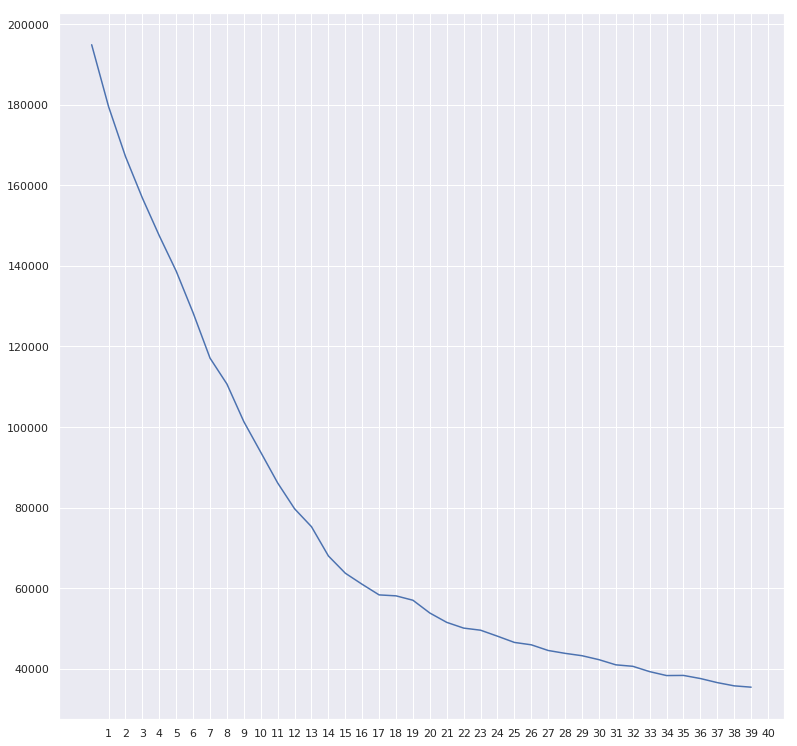

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bde73828>,
      dtype=object)

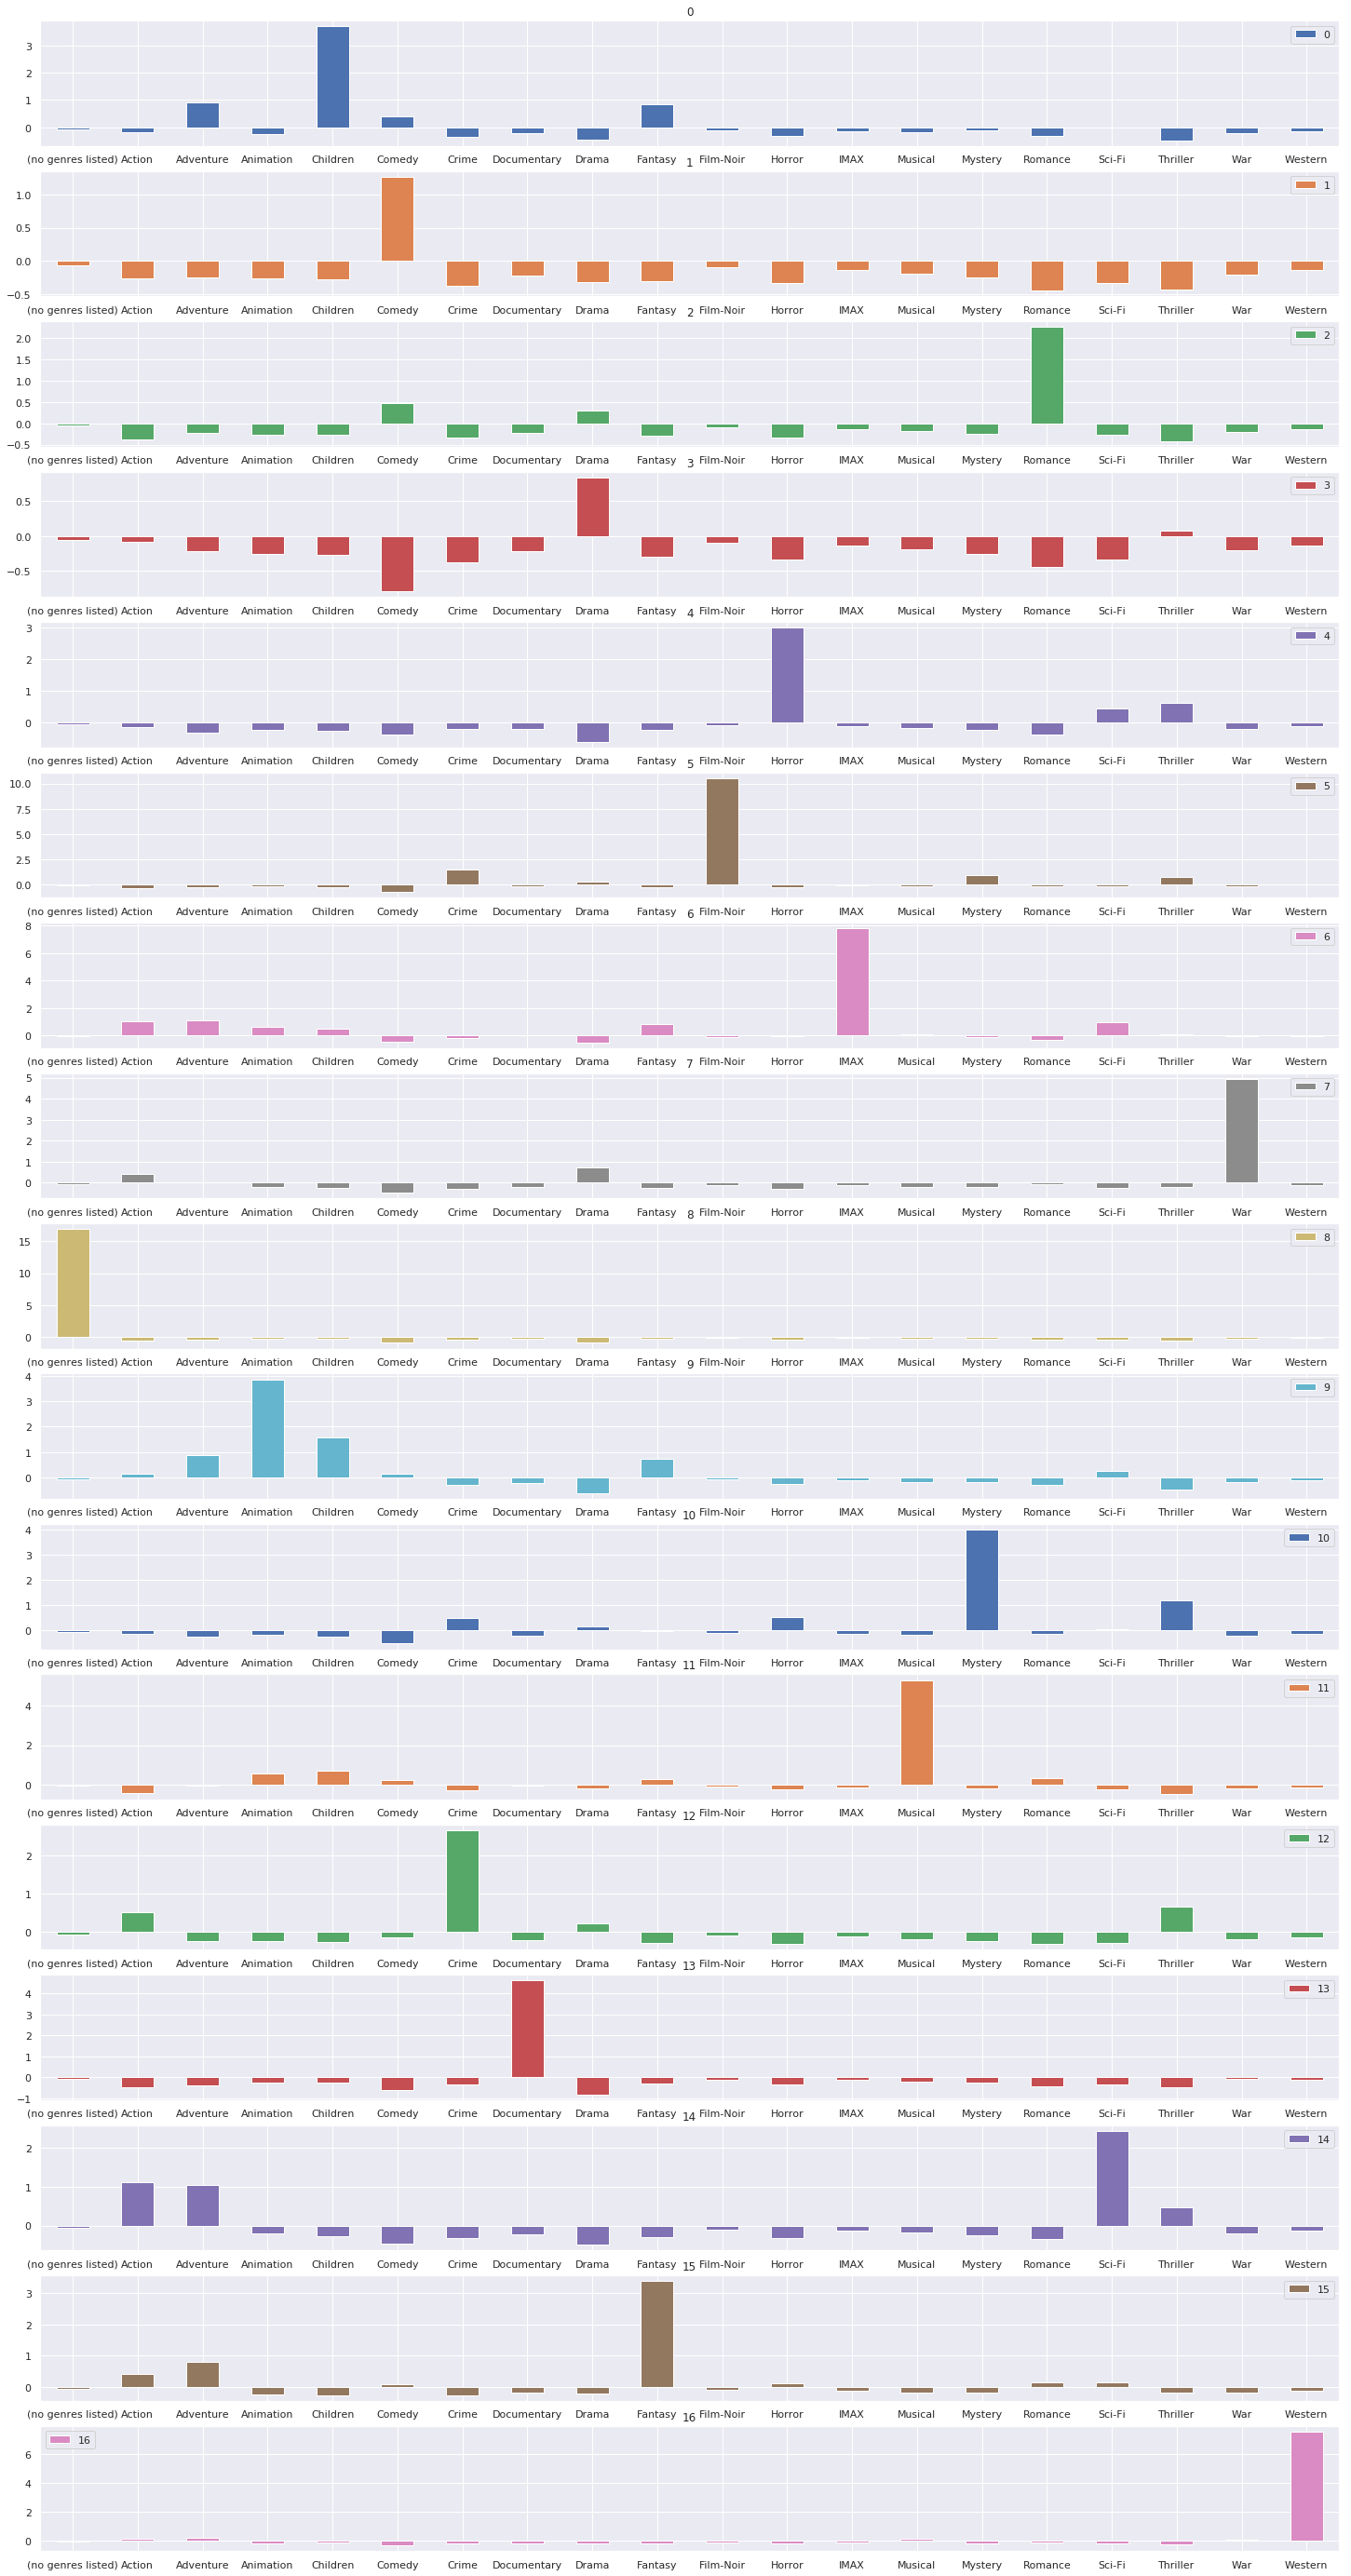

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2733,3671,Blazing Saddles (1974),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
399,458,Geronimo: An American Legend (1993),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7483,82459,True Grit (2010),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3259,4406,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6648,56782,There Will Be Blood (2007),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2896,3873,Cat Ballou (1965),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5479,26249,They Call Me Trinity (1971),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2743,3681,For a Few Dollars More (Per qualche dollaro in...,Action|Drama|Thriller|Western,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 29.239061 , -61.942688 ],
       [ 53.922688 , -52.700977 ],
       [-12.707917 ,  17.128963 ],
       ...,
       [ 33.94113  ,   5.276442 ],
       [-13.571043 , -47.659454 ],
       [ -2.0098999,  -6.5729895]], dtype=float32)

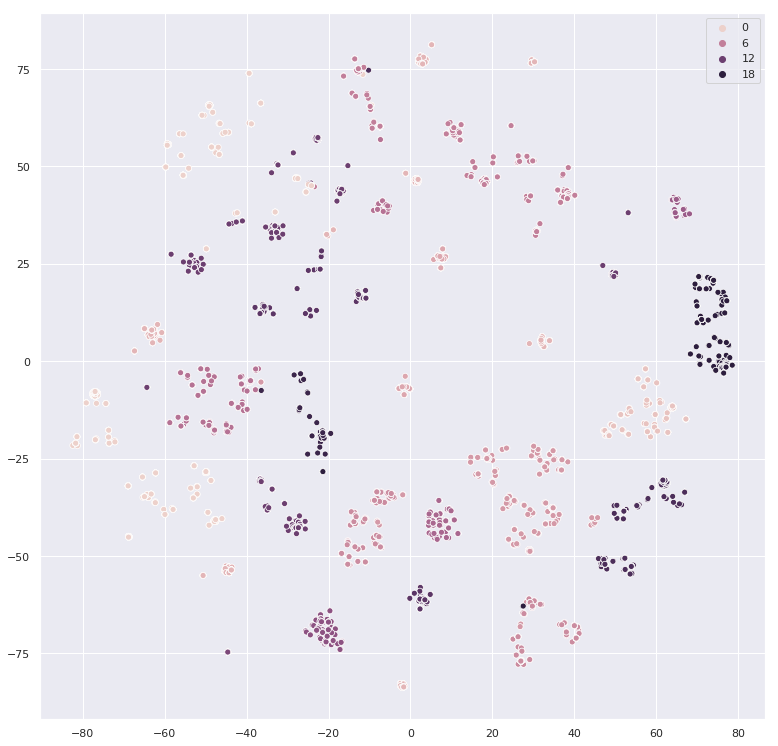

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bb1bfdd8>,
      dtype=object)

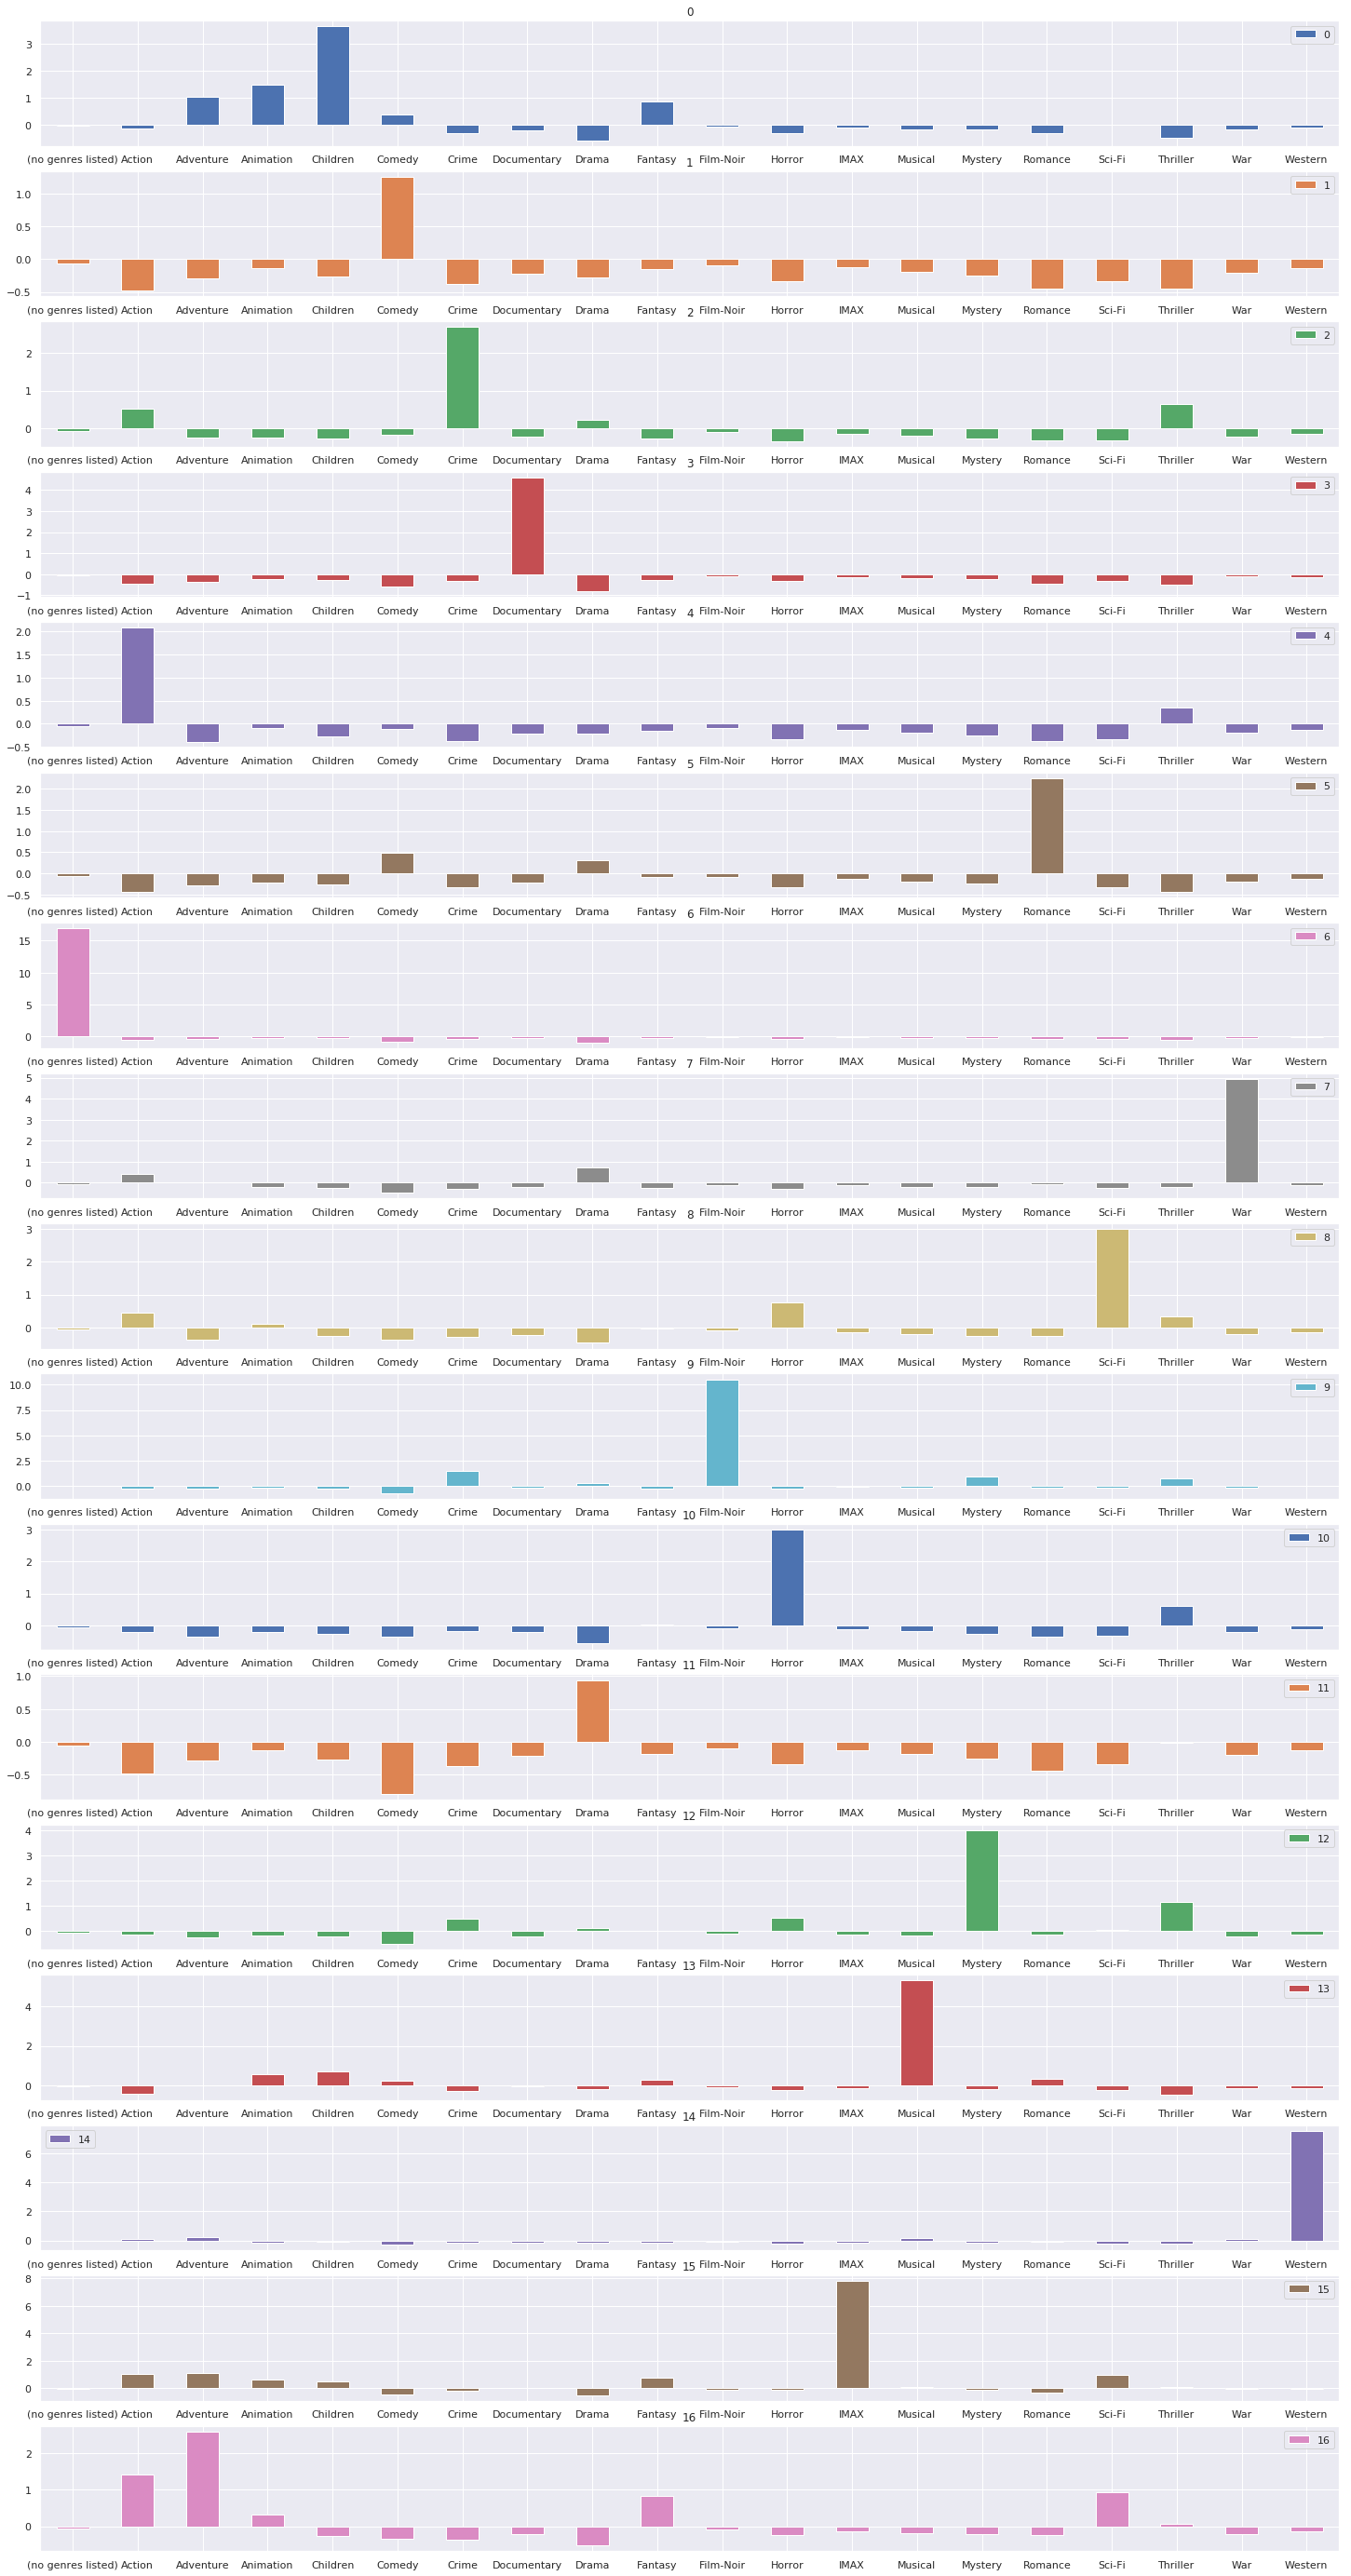

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        , 11.        ,  2.42987209,  2.        ],
       [ 5.        , 17.        ,  2.87485746,  3.        ],
       [ 4.        , 18.        ,  2.91858518,  4.        ],
       [ 2.        , 19.        ,  3.41893186,  5.        ],
       [16.        , 20.        ,  3.50811997,  6.        ],
       [10.        , 21.        ,  3.75922045,  7.        ],
       [ 8.        , 22.        ,  3.88448948,  8.        ],
       [ 0.        , 23.        ,  4.6808461 ,  9.        ],
       [12.        , 24.        ,  4.68874519, 10.        ],
       [ 3.        , 25.        ,  5.15266168, 11.        ],
       [ 7.        , 26.        ,  5.27047759, 12.        ],
       [13.        , 27.        ,  5.79762689, 13.        ],
       [14.        , 28.        ,  7.87409402, 14.        ],
       [15.        , 29.        ,  8.11856361, 15.        ],
       [ 9.        , 30.        , 10.81675845, 16.        ],
       [ 6.        , 31.        , 17.06440188, 17.        ]])

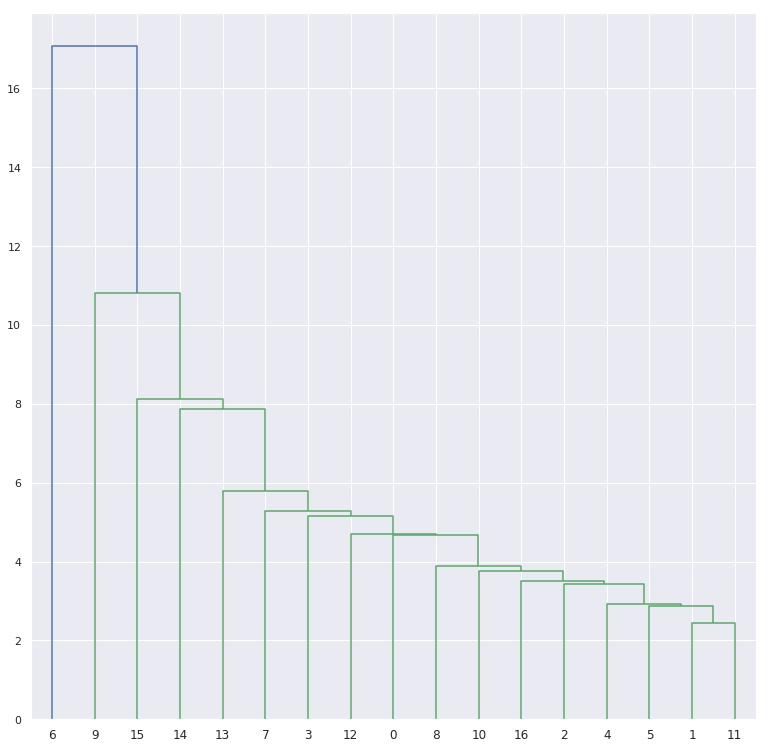

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)